In [104]:
# Importing Python libraries required for data wrangling, cleaning, analyzing, exploring and visualizing the dataset

#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Reading in the Global SuperStore orders data from an excel file using pd.read_excel() method and returns data from a csv file using pd.read_csv() method
gss_orders = pd.read_excel("D:\\Setups\\Darshit\\Studies\\Datasets\\GlobalSuperStore\\orders.xlsx")
gss_returns = pd.read_csv("D:\\Setups\\Darshit\\Studies\\Datasets\\GlobalSuperStore\\returns.csv")

In [95]:
# Merging data from orders and returns dataframe using dataframe joins
combined_data = pd.merge(gss_orders, gss_returns, on = "Order ID", how = "left")

In [96]:
# Converting Row_ID column to string type
combined_data['Row ID'] = combined_data['Row ID'].astype(str)

# Separating Distribution Center Code from the Order ID column
combined_data['Distribution Center'] = combined_data['Order ID'].apply(lambda x: x.split('-')[0])

    Exploring the dataset and uncovering Market-wise patterns in the Order quantity based on the the Category & Segment

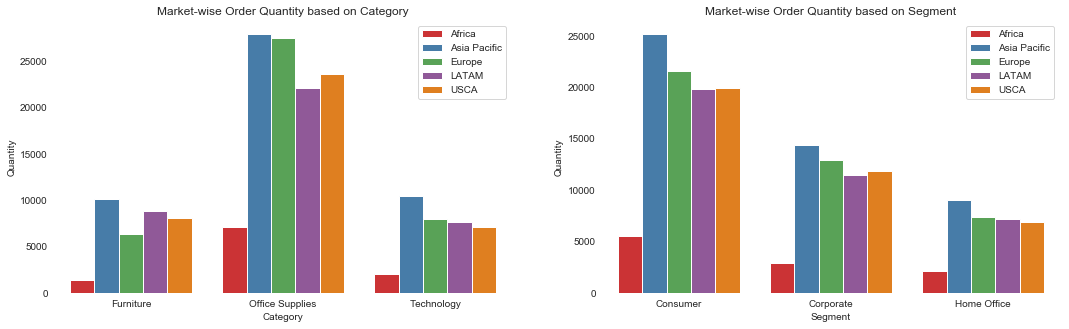

In [97]:
# Extracting data from parent dataset combined_data and creating a summary table to bifurcate Market-wise Order Quantity based on Category & Segment
market_category = combined_data.groupby(['Market','Category'])['Quantity'].sum().reset_index()
market_segment = combined_data.groupby(['Market','Segment'])['Quantity'].sum().reset_index()

# Setting the style for the plot using the sns.set_style() method
sns.set_style("white")
# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize = (18,5))
# Creating axes object and adding a subplot in the figure container
ax1 = fig.add_subplot(1,2,1)
# Plotting a seaborn barplot to compare Market-wise Order Quantity based on Category
ax1 = sns.barplot(x = 'Category', y = 'Quantity', hue = 'Market', palette = 'Set1', data = market_category)
# Decorating the plot by adding title, x-axis and y-axis label
ax1.set_title('Market-wise Order Quantity based on Category')
ax1.legend(loc = 'best')

# Creating axes object and adding a subplot in the figure container
ax2 = fig.add_subplot(1,2,2)
# Plotting a seaborn barplot to compare Market-wise Order Quantity based on Segment
ax1 = sns.barplot(x = 'Segment', y = 'Quantity', hue = 'Market', palette = 'Set1', data = market_segment)
# Decorating the plot by adding title, x-axis and y-axis label
ax1.set_title('Market-wise Order Quantity based on Segment')
ax1.legend(loc = 'best')

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


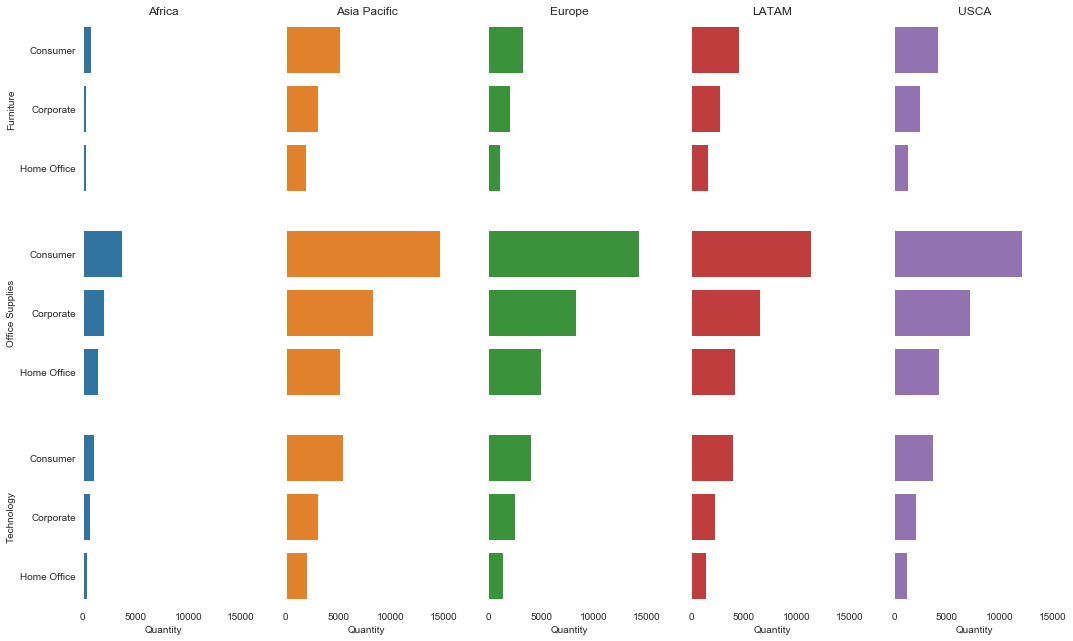

In [98]:
# Group By on the basis of Market, Category and Segment 
market_category_segment = combined_data.groupby(['Market','Category','Segment'])['Quantity'].sum().reset_index()

# Creating a FacetGrid to have an overall picture of market-wise order based on category and segments
g = sns.FacetGrid(market_category_segment, col = 'Market', row = 'Category', hue = 'Market')
g.map(sns.barplot, 'Quantity', 'Segment')

# Decorating the plot by adding title, x-axis and y-axis label
for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')
        if i == 0:
            axes_col.set_title(col.split('=')[1].strip())
        else:
            axes_col.set_title('')
        if j == 0:
            axes_col.set_ylabel(row.split('=')[1].strip())

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()

                                               EXPLORING YEAR over YEAR SALES

In [99]:
# Converting the Order Date column to datetime type and sorting the dataframe on the basis of the value in Order Date column
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'])
combined_data = combined_data.sort_values(by = 'Order Date')

In [100]:
# Extracting Month & Year from the Order Date column and summarizing the Sales figure on the basis of Year & Month
combined_data['Month'] = combined_data['Order Date'].apply(lambda x: x.month)
combined_data['Year'] = combined_data['Order Date'].apply(lambda x: x.year)
sales_monthly = combined_data.groupby(['Year','Month'])['Sales'].sum().reset_index()
sales_monthly['Sales'] = sales_monthly['Sales'] / 1000
# Average monthly sales
avg_monthly = combined_data.groupby(['Year','Month'])['Sales'].mean().reset_index()

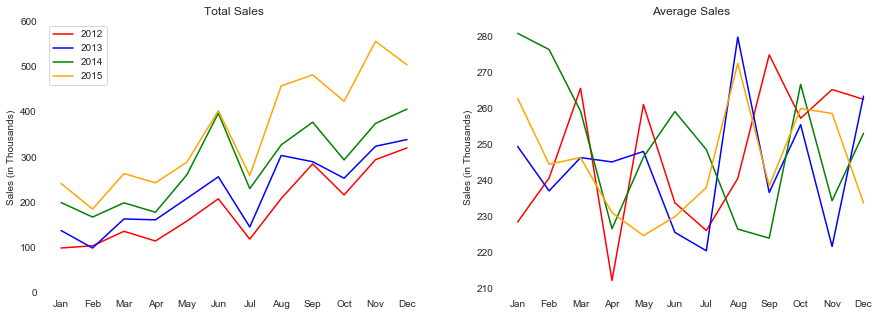

In [101]:
colors = ['red', 'blue', 'green', 'orange']
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
for i in range(4):
    start_index = i * 12
    end_index = (i + 1) * 12
    subset = sales_monthly[start_index:end_index]
    ax1.plot(subset['Month'], subset['Sales'], label = sales_monthly['Year'].unique()[i], c = colors[i])
ax1.set_ylim(0,600)
ax1.set_title('Total Sales')
ax1.set_ylabel('Sales (in Thousands)')
ax1.set_xticks(np.arange(1,13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax2 = fig.add_subplot(1,2,2)
for i in range(4):
    start_index = i * 12
    end_index = (i + 1) * 12
    subset = avg_monthly[start_index:end_index]
    ax2.plot(subset['Month'], subset['Sales'], label = subset['Year'].unique(), c = colors[i])
ax2.set_title('Average Sales')
ax2.set_ylabel('Sales (in Thousands)')
ax2.set_xticks(np.arange(1,13))
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax1.legend(loc = 'best')
sns.despine(bottom = True, left = True)

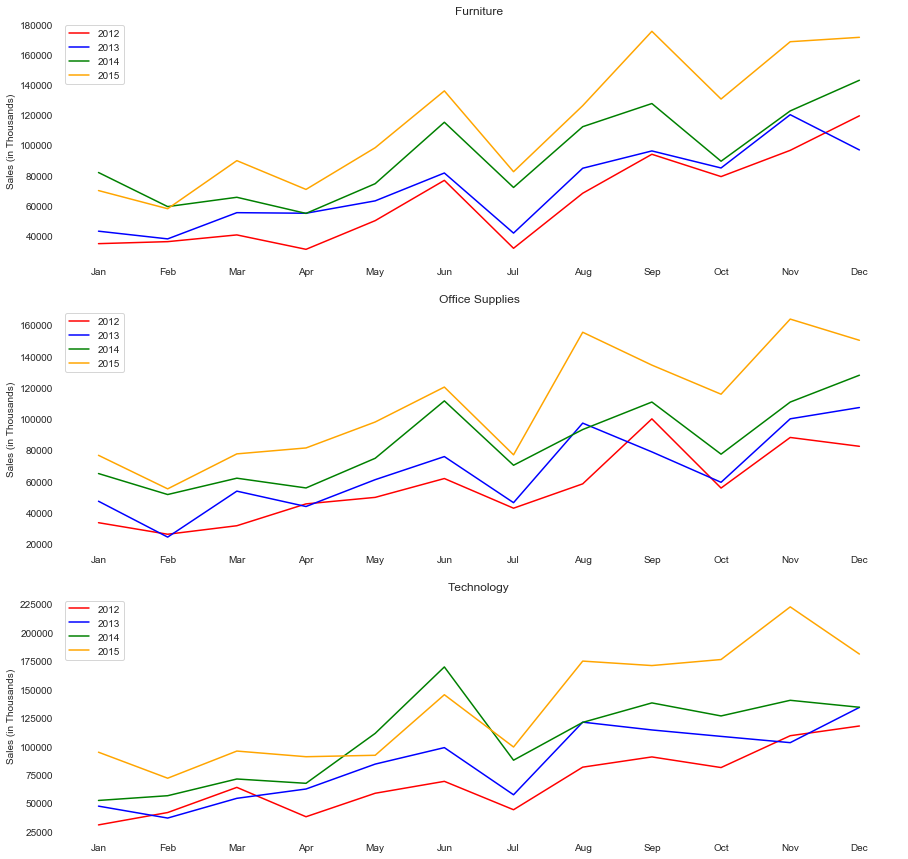

In [102]:
# Grouping & Sorting on the basis of Category, Year & Month
sales_category = combined_data.groupby(['Year','Month','Category'])['Sales'].sum().reset_index().sort_values(by = ['Category', 'Year','Month'])

colors = ['red', 'blue', 'green', 'orange']
fig = plt.figure(figsize = (15,15))
sales_furn = sales_category[sales_category['Category'] == 'Furniture']
sales_off = sales_category[sales_category['Category'] == 'Office Supplies']
sales_tech = sales_category[sales_category['Category'] == 'Technology']
sales_list = [sales_furn, sales_off, sales_tech]

for i in range(3):
    ax = fig.add_subplot(3,1,(i+1))
    for j in range(4):
        start_index = j*12
        end_index = (j + 1) * 12
        subset = sales_list[i][start_index:end_index]
        ax.plot(subset['Month'], subset['Sales'], label = sales_monthly['Year'].unique()[j], c = colors[j])
        ax.legend(loc = 'best')
        ax.set_title(subset['Category'].unique()[0])
        ax.set_ylabel('Sales (in Thousands)')
        ax.set_xticks(np.arange(1,13))
        ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
        
sns.despine(bottom = True, left = True)
plt.show()

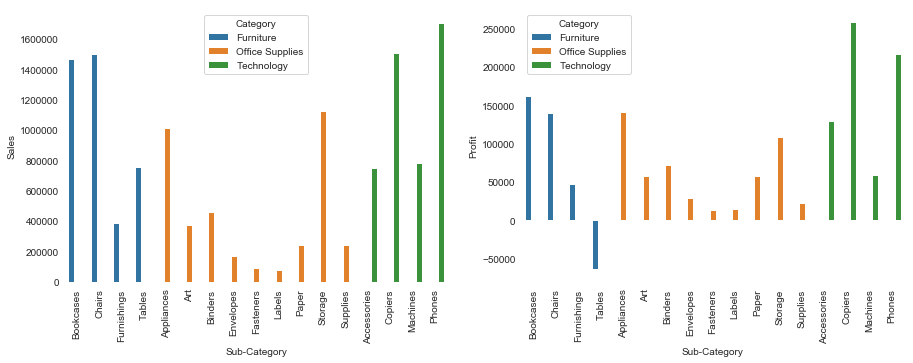

In [163]:
sales_subcategory = combined_data.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
profit_subcategory = combined_data.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index()

fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 'Sub-Category', hue = 'Category', y = 'Sales', data = sales_subcategory)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(x = 'Sub-Category', hue = 'Category', y = 'Profit', data = profit_subcategory)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

sns.despine(bottom=True, left=True)

# Displaying the plot using the show() method
plt.show()